<a href="https://colab.research.google.com/github/OmarMohammed88/GPA_Prediction/blob/master/AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import numpy.ma as ma


In [0]:
data=pd.read_csv('DATA1.csv')


<p>Display all Data </p>

In [0]:
def display_all(data):
    with pd.option_context("display.max_rows", 1000, "display.max_columns", 1000): 
        display(data)

In [0]:
data1=data.drop(data.index[0:10])

<p style="color:blue"> Drop Timestamp and GPA columns From Excel Sheet</p>



In [0]:
data1=data1.drop('Timestamp', axis=1)
#data1=data1.drop('GPA :', axis=1)

In [0]:
 X=np.array(data1[0:])
X

<h2>Covariance Matrix and Mean


In [0]:
cov=np.cov(X,y=None, rowvar=False, bias=False, ddof=None, fweights=None, aweights=None)
mean=np.mean(X,axis=0)

<p color='blue'> Generating New Data from Old Distribution Data </p>

In [0]:
 New_Data= np.random.multivariate_normal(mean, cov,243)


<h3 color='red'> Ploting Old Data and New Data</h3>

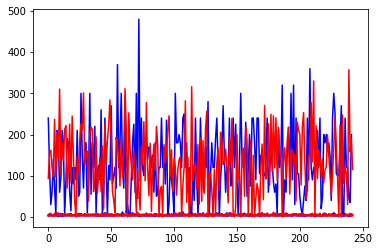

In [21]:
New_Data[New_Data < 0] = 0
plt.plot(X,color='blue')
plt.plot(New_Data,color='r')
plt.show()

<h4> This Function Delete rows whose Values =0</h4>

In [0]:
#Function Clean Data Whose Values Are 0
def Delete_Zeros(New_Data):
  index=[]
  for i in New_Data :
    if np.count_nonzero(i == 0) > 0 or np.count_nonzero(i ==( 0)):
        index.append(np.where(np.all(New_Data==i,axis=1))[0][0])
  cleaned_data=np.delete(New_Data,index,0) 
  return cleaned_data

Cleaned_data1=Delete_Zeros(New_Data)

In [0]:
#function Delete rows whose values >6 Days
def constrains_per_day(cleaned_data1):
  x=[]
  for i in range(len(cleaned_data1)):
    if cleaned_data1[i][2]>6:
      x.append(i)  
  cleaned_data2=np.delete(cleaned_data1,x,0)
  return cleaned_data2
Cleaned_data2=constrains_per_day(Cleaned_data1)


In [0]:
#This function delete rows whose Values >10 hours
def constrains_per_hours(Cleaned_data2):
  x=[]
  for i in range(len(Cleaned_data2)):
    if Cleaned_data2[i][1]>10:
      x.append(i)  
  cleaned_data3=np.delete(Cleaned_data2,x,0)
  return cleaned_data3

Cleaned_data3=constrains_per_hours(Cleaned_data2)



In [0]:
#This function delete rows whose values <5 min and >300 min
def constrains_per_min_Road(Cleaned_data3):
  x=[]
  for i in range(len(Cleaned_data3)):
    if Cleaned_data3[i][0]<5 or Cleaned_data3[i][0]>300:
      x.append(i)  
  cleaned_data4=np.delete(Cleaned_data3,x,0)
  return cleaned_data4

Final_Data=constrains_per_min_Road(Cleaned_data3)

<h1 color="blue">Ploting The New Data After Cleaning and Old Data</h1>

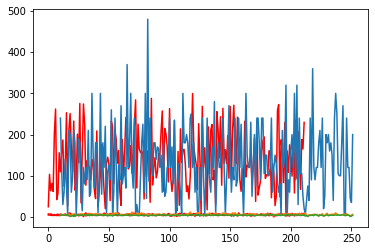

In [0]:
plt.plot(Final_Data,color='red')
plt.plot(data1)
plt.show()